In [1]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json,load_json_model
from pymodulon.util import infer_activities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from matplotlib.cm import viridis
import seaborn as sns

### Load models

In [2]:
ica_data = load_json_model('models/new_ica.json')
ica_data.imodulon_table = pd.read_csv('models/imodulon_table.csv',index_col='Unnamed: 0')

adfermnull_ica_data = load_json_model('models/electric_coli_new.json')

In [3]:
new_columns = [w for w in adfermnull_ica_data.X.columns if w not in ica_data.X.columns]

new_tpm = adfermnull_ica_data.X[new_columns]

### Infer activities for fermnull and other new samples from samples in fig 5

In [4]:
activities = infer_activities(ica_data,new_tpm)
activities.head()

/usr/local/lib/python3.8/dist-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


,ELECOLI_HRS_adapted_FermNull_HNQ_Rep1,ELECOLI_HRS_adapted_FermNull_HNQ_Rep2,ELECOLI_HRS_adapted_FermNull_HNQ_Rep3,ELECOLI_HRS_adapted_FermNull_DMSO_Rep1,ELECOLI_HRS_adapted_FermNull_DMSO_Rep2,ELECOLI_HRS_adapted_FermNull_DMSO_Rep3,ELECOLI_HRS_BioD_DMSO_10_1,ELECOLI_HRS_BioD_DMSO_10_2,ELECOLI_HRS_BioD_HNQ_10_1,ELECOLI_HRS_BioD_HNQ_10_2,...,ELECOLI_HRS_BioD_HNQ_2_1,ELECOLI_HRS_BioD_HNQ_2_2,ELECOLI_HRS_BioD_HNQ_2_3,ELECOLI_HRS_FermNull_1,ELECOLI_HRS_FermNull_2,ELECOLI_HRS_FermNull_3,ELECOLI_HRS_FermNull_evolved_level_0_1,ELECOLI_HRS_FermNull_evolved_level_0_2,ELECOLI_HRS_FermNull_evolved_level_1_1,ELECOLI_HRS_FermNull_evolved_level_1_3
Curli-1,-9.272737,-12.511218,-13.344814,-12.150562,-9.510599,-10.301528,-2.548042,-1.991114,-3.264476,-2.598560,...,3.173720,2.529689,3.382776,-6.998394,-7.737348,-7.281486,-5.719912,-6.950522,-6.161311,-7.525595
Membrane,-4.005291,-4.710676,-4.570039,-3.603178,-2.192512,-3.831635,7.452406,7.085938,5.473963,6.289233,...,-1.261563,-1.606425,-1.421565,-2.852726,-3.184895,-2.496186,-2.480548,-3.106300,-3.611555,-4.714444
PlaR,-1.476043,-0.965917,-1.205461,-0.883715,0.938718,-0.803971,0.716159,0.510507,0.033375,0.606590,...,-0.690795,0.833910,0.196835,-1.555668,-2.433707,-3.141140,2.219460,-0.447599,-1.537310,-1.472469
Sulfoquinovose,2.020123,1.539876,0.698436,0.231626,0.729965,1.286994,0.231216,2.096043,-0.046810,0.182747,...,0.658084,1.083272,1.082184,4.078790,3.118900,3.661001,4.771064,4.345746,2.789803,3.570012
EvgA,4.325120,3.912293,1.489083,0.392523,4.192801,3.642687,1.265789,2.863532,0.787827,0.943547,...,2.261116,2.711492,2.667652,5.545104,5.074905,5.451808,6.865604,5.238466,6.719560,5.126053


### PCA on inferred activities and important iMs

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


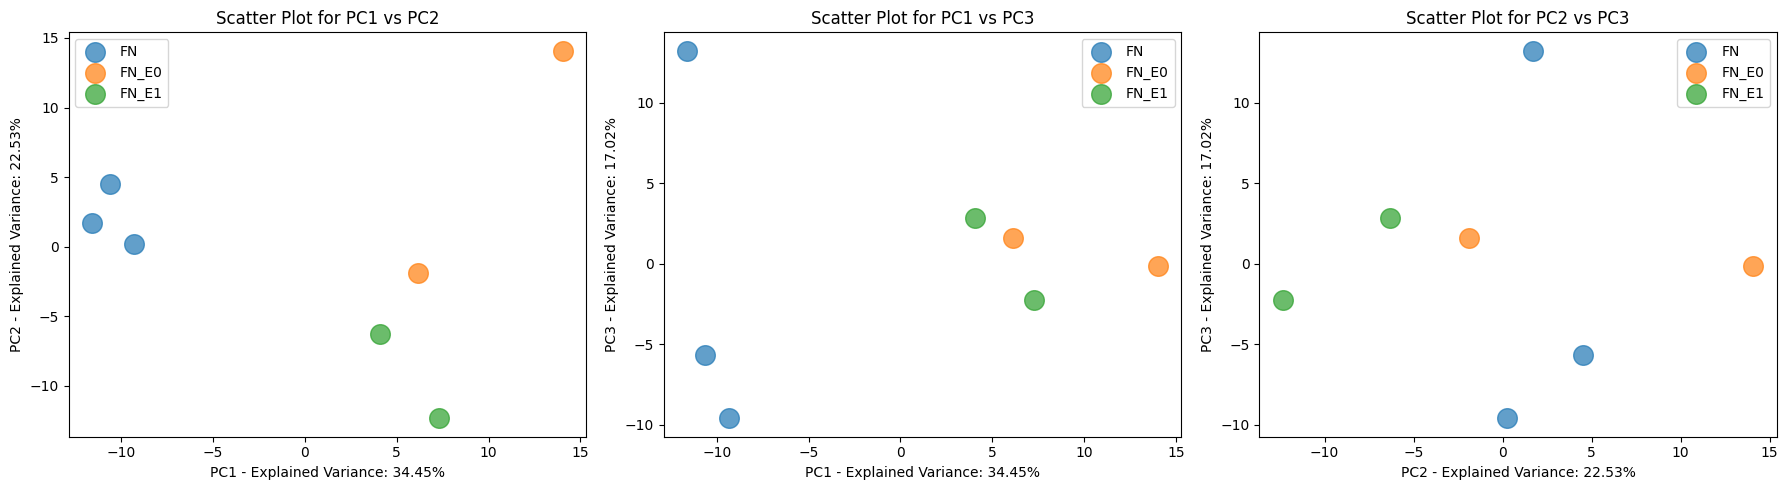

In [5]:
'''
The samples list define all sample names for which PCA is done, the labels plot labels the sample type for 
the scatter plot
'''
samples =  ['ELECOLI_HRS_FermNull_1','ELECOLI_HRS_FermNull_2',
            'ELECOLI_HRS_FermNull_3','ELECOLI_HRS_FermNull_evolved_level_0_1','ELECOLI_HRS_FermNull_evolved_level_0_2',
            'ELECOLI_HRS_FermNull_evolved_level_1_1','ELECOLI_HRS_FermNull_evolved_level_1_3']

labels = ['FN','FN','FN','FN_E0','FN_E0','FN_E1','FN_E1']


# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(activities[samples].T)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the labels with the principal components
df_pca['Labels'] = labels

# Set up the scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Get unique labels
unique_labels = list(set(labels))

# Create a color map
colors = [viridis(i / len(unique_labels)) for i in range(len(unique_labels))]

# Loop through each pair of principal components
for i, (x_pc, y_pc) in enumerate([(0, 1), (0, 2), (1, 2)]):
    ax = axs[i]
    
    # Plot each label with a different color
    for j, label in enumerate(unique_labels):
        label_df = df_pca[df_pca['Labels'] == label]
        ax.scatter(label_df.iloc[:, x_pc], label_df.iloc[:, y_pc], label=label, alpha=0.7, s=200)

    # Set plot labels and title
    ax.set_xlabel(f'PC{x_pc + 1} - Explained Variance: {pca.explained_variance_ratio_[x_pc]:.2%}')
    ax.set_ylabel(f'PC{y_pc + 1} - Explained Variance: {pca.explained_variance_ratio_[y_pc]:.2%}')
    ax.set_title(f'Scatter Plot for PC{x_pc + 1} vs PC{y_pc + 1}')
    ax.legend()

# Show the plots
plt.tight_layout()
plt.show()

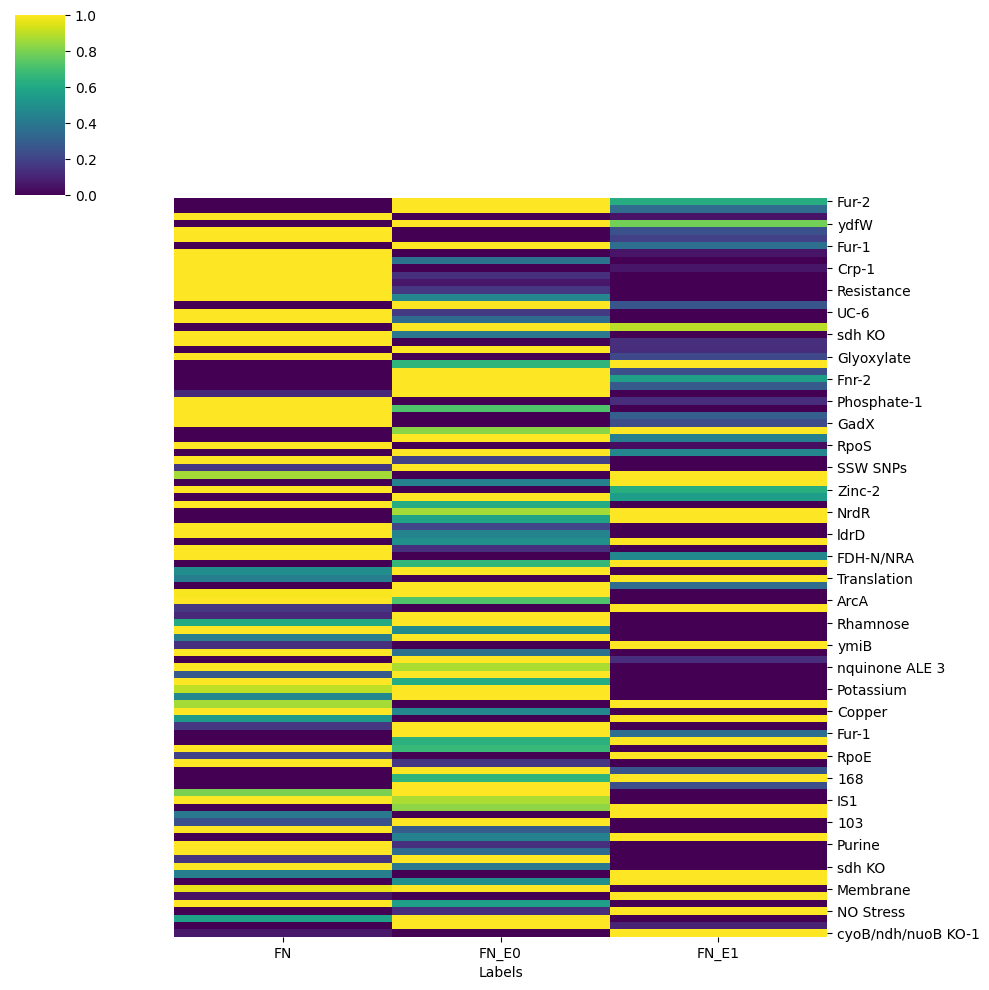

In [6]:
#PC1 separates Evolved/Unevolved samples, PC2 separates EV0 and EV1

# Get the loadings of the original features onto PC1 and PC2
loadings_pc1 = pca.components_[0, :]
loadings_pc2 = pca.components_[1, :]

top_n = 50  
top_indices_pc1 = abs(loadings_pc1).argsort()[-top_n:][::-1]
top_indices_pc2 = abs(loadings_pc2).argsort()[-top_n:][::-1]

pc1_top = activities[samples].iloc[top_indices_pc1]
pc2_top = activities[samples].iloc[top_indices_pc2]

pc_top = pd.concat([pc1_top,pc2_top])

pc_top = pc_top[samples]

df_labels = pd.DataFrame({'Labels': labels})

# Concatenate the labels DataFrame with the pc_top DataFrame
pc_top_with_labels = pd.concat([df_labels, pc_top.T], axis=1)

pc_top = pc_top.T
pc_top['Labels'] = labels


# Group by 'Labels' and calculate the mean for each group
averaged_pc_top = pc_top.groupby('Labels').mean()

# Transpose the result to have samples as columns again
averaged_pc_top = averaged_pc_top.T

def normalize_row(row):
    min_val = row.min()
    max_val = row.max()
    normalized_row = (row - min_val) / (max_val - min_val)
    return normalized_row

# Apply the normalization function to each row
normalized_averaged_pc_top = averaged_pc_top.apply(normalize_row, axis=1)

np.random.seed(42)
cmap = sns.clustermap(normalized_averaged_pc_top, cmap="viridis", row_cluster=False,col_cluster=False,figsize=(10,10))
plt.show()

### PCA biplot with highlighted iMs

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


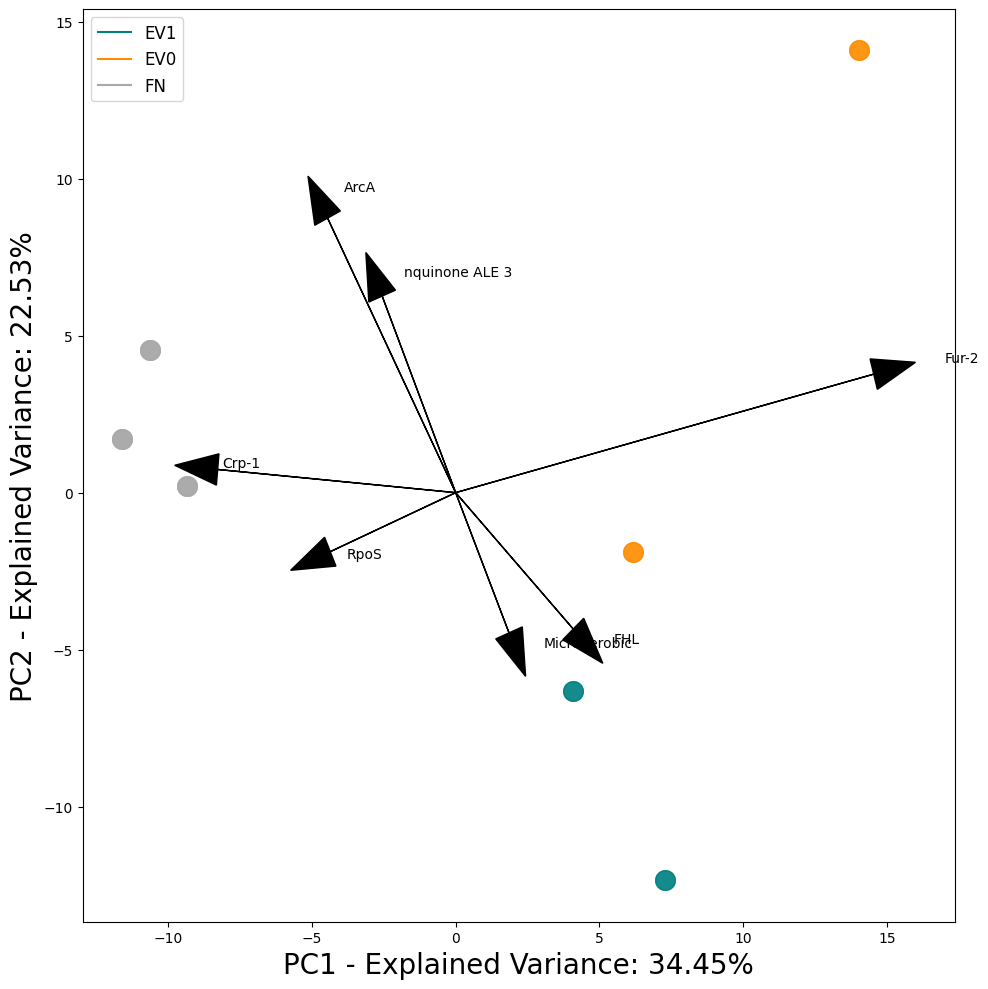

In [8]:
'''
The samples list define all sample names for which PCA is done, the labels plot labels the sample type for 
the scatter plot
'''

import itertools
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

samples =  ['ELECOLI_HRS_FermNull_1','ELECOLI_HRS_FermNull_2',
            'ELECOLI_HRS_FermNull_3','ELECOLI_HRS_FermNull_evolved_level_0_1','ELECOLI_HRS_FermNull_evolved_level_0_2',
            'ELECOLI_HRS_FermNull_evolved_level_1_1','ELECOLI_HRS_FermNull_evolved_level_1_3']

labels = ['FN','FN','FN','FN_E0','FN_E0','FN_E1','FN_E1']


# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(activities[samples].T)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the labels with the principal components
df_pca['Labels'] = labels

# Set up the scatter plots
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

 
# Define color and marker mappings
color_map = {'FN_E1': 'teal', 'FN_E0': 'darkorange', 'FN': 'darkgrey'}
#marker_map = {'HNQ': 'o', 'DMSO': 'D'}

# Plot each label with a different color and marker
for label, marker_color in zip(labels, itertools.cycle(color_map.values())):
    
    color = color_map.get(label)
    
    # Extract data for current label
    label_df = df_pca[df_pca['Labels'] == label]
    
    ax.scatter(label_df.iloc[:, 0], label_df.iloc[:, 1], label=label, alpha=0.7, s=200, c=color)
  


ax.set_xlabel(f'PC{1} - Explained Variance: {pca.explained_variance_ratio_[0]:.2%}',fontsize=20)
ax.set_ylabel(f'PC{2} - Explained Variance: {pca.explained_variance_ratio_[1]:.2%}',fontsize=20)
ax.legend()



##Add in arrows for biplot
loadings = pd.DataFrame(index=activities.index)
loadings['PC1'] = pca.components_[0, :]
loadings['PC2'] = pca.components_[1, :]

arrows_to_make = ['RpoS','Crp-1','Microaerobic','ArcA','FHL','nquinone ALE 3','Fur-2']


# arrow length variable extends arrows to help in interpreting the plot
# text_scale determines how far text labels are from arrow tips (1 = on top of them)
arrow_length = 50
text_scale = 1.1

# the place the arrows start is up to you, so you can move it out of the way
start1 = 0
start2 = 0

# loop through each gene and add its arrow
for g in arrows_to_make:
    # directions in PC1 and 2
    g_weight_pc1 = loadings.loc[g, 'PC1']
    g_weight_pc2 = loadings.loc[g, 'PC2']
    
    # lengthen arrow by a constant factor
    g_weight_pc1 = g_weight_pc1 * arrow_length
    g_weight_pc2 = g_weight_pc2 * arrow_length
    
    # add the arrow
    ax.arrow(start1, start2, g_weight_pc1, g_weight_pc2, head_width = 1,color='black')

    ax.text(start1 + (text_scale * g_weight_pc1)+1,
            start2 + (text_scale * g_weight_pc2), 
            g,size=10)
    
    
legend_handles = []

# HNQ Legend

legend_handles.append((mpatches.Patch(color='black', label='Anoxic'), mlines.Line2D([], [], color='teal', label='EV1')))
legend_handles.append((mpatches.Patch(color='black', label='QRed'), mlines.Line2D([], [], color='darkorange', label='EV0')))
legend_handles.append((mpatches.Patch(color='black', label='QRed'), mlines.Line2D([], [], color='darkgrey', label='FN')))


plt.legend(handles=[handle[1] for handle in legend_handles], loc='upper left',fontsize=12)

# Show the plots
plt.tight_layout()


### DiMA (Differential imodulon activity)

In [9]:
#add in inferred sample metadata and make new ICA object

temp_ica_data = load_json_model('models/electric_coli_new.json')
new_A = pd.concat([ica_data.A,activities],axis=1)
new_X = pd.concat([ica_data.X,new_tpm],axis=1)

new_ica_data = IcaData(ica_data.M,new_A)
new_ica_data.sample_table = temp_ica_data.sample_table
new_ica_data.gene_table = ica_data.gene_table
new_ica_data.imodulon_table = ica_data.imodulon_table
new_ica_data.X = new_X

/usr/local/lib/python3.8/dist-packages/pymodulon/util.py:174: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  _diff[":".join(name)] = abs(A_to_use[i1] - A_to_use[i2])
/usr/local/lib/python3.8/dist-packages/pymodulon/util.py:174: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  _diff[":".join(name)] = abs(A_to_use[i1] - A_to_use[i2])
/usr/local/lib/python3.8/dist-packages/pymodulon/util.py:174: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

                   difference    pvalue    qvalue          0          1
Fur-2                3.833343  0.049287  0.301908 -19.056476 -15.223133
ydfW                 3.092120  0.041566  0.301908  -4.911645  -1.819525
168                  2.952258  0.020526  0.301908   2.374941   5.327199
ymiB                 2.673226  0.076828  0.325648  -0.115735   2.557492
nquinone ALE 3      -2.572815  0.042816  0.301908  10.225862   7.653046
UC-6                -2.655858  0.041667  0.301908   4.560467   1.904609
FliA                -2.784164  0.040632  0.301908   8.059177   5.275013
sdh KO              -2.788964  0.019607  0.301908  -8.870723 -11.659687
N Reduction         -2.883880  0.063555  0.321406   1.232543  -1.651337
Crp-1               -2.884677  0.054372  0.301908  14.103500  11.218824
cyoB/kdpE/qseB KO   -2.956862  0.021232  0.301908  -9.820058 -12.776920
NtrC-1              -2.999930  0.011455  0.301908  -0.300782  -3.300711
FDH-O               -3.116540  0.011512  0.301908   4.582429   1

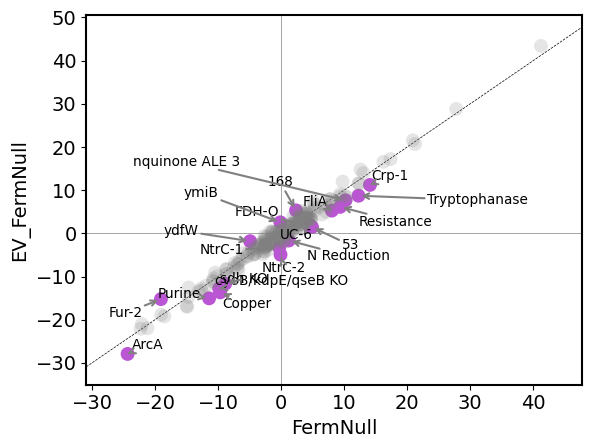

In [10]:
from pymodulon.plotting import *
from pymodulon.util import _parse_sample, dima, explained_variance, mutual_info_distance
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5

def plot_dima_local(
    ica_data,
    sample1,
    sample2,
    threshold=2.5,
    fdr=1,
    label=True,
    adjust=True,
    table=False,
    **kwargs,
):
    """
    Plots a DiMA plot between two projects or two sets of samples

    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    sample1: list or str
        List of sample IDs or name of "project:condition" for x-axis
    sample2: list or str
        List of sample IDs or name of "project:condition" for y-axis
    threshold: float
        Minimum activity difference to determine DiMAs (default: 5)
    fdr: float
        False detection rate (default: 0.1)
    label: bool
        Label differentially activated iModulons (default: True)
    adjust: bool
        Automatically adjust labels (default: True)
    table: bool
        Return differential iModulon activity table (default: False)
    **kwargs:
        Additional keyword arguments passed to :func:`pymodulon.plotting.scatterplot`

    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the scatterplot

    df_diff: ~pandas.DataFrame, optional
        Table reporting differentially activated iModulons

    """

    # use secret option to enable passing of clustered activity matrix
    try:
        A_to_use = kwargs.pop("alternate_A")
    except KeyError:
        A_to_use = ica_data.A

    # Override specific kwargs (their implementation is different
    # in this function)
    legend_cgw = kwargs.pop("legend", False)
    legend_kwargs_cgw = kwargs.pop("legend_kwargs", {})

    kwargs["legend"] = False
    kwargs["legend_kwargs"] = None

    # Get x and y coordinates
    sample1_list = _parse_sample(ica_data, sample1)
    sample2_list = _parse_sample(ica_data, sample2)
    if isinstance(sample1, str):
        xlabel = sample1
    else:
        xlabel = "\n".join(sample1)
    if isinstance(sample2, str):
        ylabel = sample2
    else:
        ylabel = "\n".join(sample2)

    a1 = A_to_use[sample1_list].mean(axis=1)
    a2 = A_to_use[sample2_list].mean(axis=1)

    df_diff = dima(
        ica_data,
        sample1_list,
        sample2_list,
        threshold=threshold,
        fdr=fdr,
        alternate_A=A_to_use,
    )

    groups = {}
    for i in A_to_use.index:
        if i not in df_diff.index:
            groups.update({i: "hidden"})
        else:
            groups.update({i: ""})
            
    scatter_kwargs = {
    's': 100,       # Size of scatter points
    'alpha': 1,   # Transparency
    'edgecolor': 'none',  # Edge color (if needed)
    }
    

    
    ax = scatterplot(
        a1,
        a2,
        groups=groups,
        line45=True,
        xlabel=xlabel,
        ylabel=ylabel,
        colors = 'mediumorchid',
        scatter_kwargs = scatter_kwargs,
        **kwargs,
    )
    
    # Get indices of hidden points (grey)
    hidden_indices = [i for i, g in groups.items() if g == "hidden"]
    
    # Update alpha for grey points
    for coll in ax.collections:
        if coll.get_offsets().shape[0] == len(hidden_indices):
            coll.set_alpha(0.2)  # Adjust the alpha value as needed

    if label:
        df_diff = pd.concat([df_diff, a1, a2], join="inner", axis=1)
        texts = []
        for k in df_diff.index:
            texts.append(ax.text(df_diff.loc[k, 0], df_diff.loc[k, 1], k, fontsize=9.8))
        if adjust:
            expand_args = {
                "expand_objects": (1.2, 1.4),
                "expand_points": (1.3, 1.3),
                "expand_text": (1.4, 1.4),
            }
            adjust_text(
                texts,
                ax=ax,
                arrowprops=dict(arrowstyle="->", color="grey", lw=1.5),
                only_move={"objects": "y"},
                **expand_args,
            )
    print(df_diff)
    # Add legend if requested
    if legend_cgw:
        ax.legend(**legend_kwargs_cgw)

    if table:
        return ax, df_diff

    else:
        return ax, df_diff
    
    
#teal_color = 'teal'

# Call the plot_dima function and set the color parameter
ax,df_diff = plot_dima_local(new_ica_data, 'electric_coli:ebk_fermnull', 'electric_coli:ebk_ev1fermnull')
# Save the plot to a file (e.g., in PNG format)
#plt.savefig('92vs148.png', dpi=300, bbox_inches='tight')
plt.xlabel('FermNull',fontsize=14)
plt.ylabel('EV_FermNull',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig('dima_Fermnull_Ev0_Fermnull.pdf',format='pdf', bbox_inches='tight',dpi=600)
# Display the plot (optional)
plt.show()

### Plot HNQ degradation imodulon activity across samples and check its activity vs the rest of precise1K transcriptomes

In [13]:
new_ica_data = load_json_model('models/electric_coli_new.json')
new_M = pd.read_csv('models/M.csv',index_col='Unnamed: 0')
new_A = pd.read_csv('models/A.csv',index_col='Unnamed: 0')

from pymodulon.compare import *

links,dots = compare_ica(new_ica_data.M,new_M)
im_mapping = pd.DataFrame(data=links,columns=['P1K','new_run','Corr'])
im_mapping = im_mapping[~im_mapping['P1K'].duplicated(keep=False)]

im_mapping

,P1K,new_run,Corr
0,Sugar Diacid,19,0.989094
1,Translation,51,0.969906
2,ygdT,159,0.866041
3,OxyR,146,0.987854
4,FlhDC-2,113,0.986680
...,...,...,...
187,cyoB/ndh/nuoB KO-2,197,0.714837
188,tpiA KO,97,0.894018
189,Phage Shock,85,0.853688
190,Glyoxylate,9,0.853991


In [14]:
new_unmapped_imodulons = [w for w in new_M.columns if w not in im_mapping['new_run'].tolist()]
p1k_unmapped_imodulons = [w for w in new_ica_data.M.columns if w not in im_mapping['P1K'].tolist()]

new_A.index=[im_mapping[im_mapping['new_run'] == str(w)]['P1K'].tolist()[0] if str(w) in im_mapping['new_run'].tolist() else str(w) for w in new_A.index]
new_M.columns = [im_mapping[im_mapping['new_run'] == str(w)]['P1K'].tolist()[0] if str(w) in im_mapping['new_run'].tolist() else str(w) for w in new_A.index]




In [15]:
ica_data2 = IcaData(new_M,new_A)
ica_data2.X = new_ica_data.X
ica_data2.trn = new_ica_data.trn
ica_data2.gene_table = new_ica_data.gene_table
ica_data2.sample_table = new_ica_data.sample_table

In [16]:
ica_data2.view_imodulon(109)

,gene_weight,gene_name,synonyms,gene_product,cog,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0802,0.298734,ybiJ,ybiJ,DUF1471 domain-containing protein YbiJ,Function unknown,"YhaJ,Lrp",P0AAX3,837665,837925,-,...,True,False,14.0,NaN,True,True,6.728623,5.891542,1.067255,True
b1412,0.270074,azoR,azoR;acpD,FMN dependent NADH:quinone oxidoreductase,Lipid transport and metabolism,RpoD,P41407,1482255,1482860,-,...,False,True,678.5,587.0,True,True,6.667119,6.640503,0.593172,True
b3039,0.212727,ygiD,ygiD,4%2C5-DOPA dioxygenase extradiol,Function unknown,YhaJ,UPI000013B0C2,3181619,3182434,-,...,False,False,NaN,NaN,False,True,3.811088,3.772215,0.574726,False
b3101,0.282433,yqjF,yqjF,DoxX family protein,Function unknown,"YhaJ,ppGpp",P42619,3250562,3250954,+,...,True,False,NaN,NaN,False,True,3.651395,3.445408,1.009805,False
b3106,0.257266,yhaK,yhaK,bicupin-related protein,Function unknown,YhaJ,P42624,3254319,3255020,+,...,True,False,NaN,NaN,False,True,3.037738,3.132715,0.607878,False
b3439,0.159669,yhhW,yhhW,quercetin 2%2C3-dioxygenase,Function unknown,"YhaJ,Lrp",P46852,3578950,3579645,-,...,False,True,111.0,158.0,True,True,4.950034,5.229537,0.604800,False
b4199,0.140771,yjfY,yjfY,DUF1471 domain-containing protein YjfY,Function unknown,"GlaR,ppGpp",P0AF86,4424516,4424791,-,...,True,False,NaN,NaN,False,True,3.045992,3.975949,1.370622,False


Text(0, 0.5, 'HNQ degradation activity')

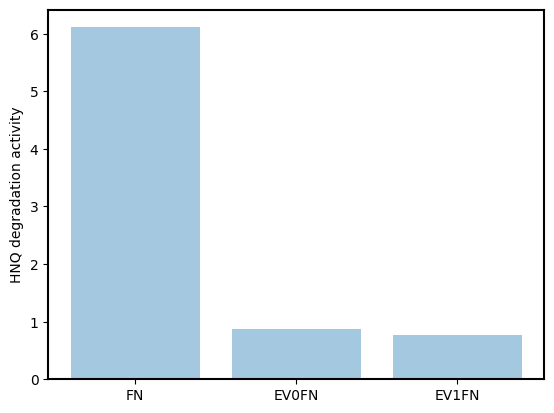

In [17]:
samples = ica_data2.A.iloc[:,-7:]

#samples.iloc[:,5:]#.mean(axis=1)
hnq_deg_unev = samples.iloc[:,0:3].mean(axis=1)
hnq_deg_ev0= samples.iloc[:,3:5].mean(axis=1)
hnq_deg_ev1= samples.iloc[:,5:].mean(axis=1)


plt.bar(['FN','EV0FN','EV1FN'],[hnq_deg_unev.loc[109],hnq_deg_ev0.loc[109],hnq_deg_ev1.loc[109]],alpha=0.4)
plt.ylabel('HNQ degradation activity',fontsize=10)


### Plot HNQ deg imodulon activity and compare how active it is in the rest of Precise1Ks samples

Text(0.5, 0.5, 'p=0.0001')

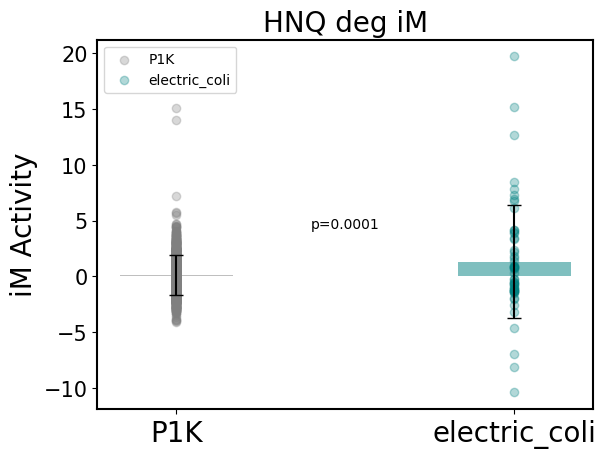

In [18]:
from scipy.stats import ttest_ind

df = pd.DataFrame(ica_data2.A.loc[109])

# Extract data for P1K and Electric_Coli samples
p1k_data = df[df.index.str.startswith('p1k')]
ecoli_data = df[~df.index.str.startswith('p1k')]


# Example data for P1K and electric_coli
P1K = p1k_data[109].tolist()
electric_coli = ecoli_data[109].tolist()

# Calculate mean and standard deviation for error bars
# Calculate mean and standard deviation for error bars
mean_P1K = np.mean(P1K)
std_P1K = np.std(P1K)
mean_electric_coli = np.mean(electric_coli)
std_electric_coli = np.std(electric_coli)

# Calculate t-test
t_stat, p_value = ttest_ind(P1K, electric_coli)

# Plotting
fig, ax = plt.subplots()

# Bar plot for error bars
ax.bar([0, 0.3], [mean_P1K, mean_electric_coli], yerr=[std_P1K, std_electric_coli], capsize=5, color=['grey', 'teal'], alpha=0.5,width=0.1)

# Scatter points
ax.scatter([0]*len(P1K), P1K, color='grey',alpha=0.3,label='P1K')
ax.scatter([0.3]*len(electric_coli), electric_coli, color='teal', alpha=0.3,label='electric_coli')

# Add labels and title
ax.set_xticks([0, 0.3])
ax.tick_params(axis='y', labelsize=15)
ax.set_xticklabels(['P1K', 'electric_coli'],fontsize=20)
ax.set_ylabel('iM Activity',fontsize=20)
ax.set_title('HNQ deg iM',fontsize=20)
ax.legend(fontsize=10)

# Add p-value
ax.text(0.5, 0.5, f'p={p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
